In [92]:
# Import dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [94]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [95]:
from citipy import citipy

In [96]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [97]:
import requests
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | omboue
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | husavik
Processing Record 5 of Set 1 | vardo
Processing Record 6 of Set 1 | richards bay
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | naze
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | inuvik
Processing Record 15 of Set 1 | basoko
Processing Record 16 of Set 1 | colares
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | traralgon
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | karatau
Processin

Processing Record 37 of Set 4 | torbay
Processing Record 38 of Set 4 | lazi
Processing Record 39 of Set 4 | yenagoa
Processing Record 40 of Set 4 | pingliang
Processing Record 41 of Set 4 | kahului
Processing Record 42 of Set 4 | maniitsoq
Processing Record 43 of Set 4 | araouane
Processing Record 44 of Set 4 | limoeiro do ajuru
Processing Record 45 of Set 4 | angoram
Processing Record 46 of Set 4 | mataura
Processing Record 47 of Set 4 | praia da vitoria
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | isangel
Processing Record 50 of Set 4 | bengkulu
Processing Record 1 of Set 5 | monticello
Processing Record 2 of Set 5 | burica
City not found. Skipping...
Processing Record 3 of Set 5 | ilulissat
Processing Record 4 of Set 5 | la mana
Processing Record 5 of Set 5 | east london
Processing Record 6 of Set 5 | xinglongshan
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | itarema
Processing Record 9 of Set 5 | dikson
Processing Record 10 of S

Processing Record 30 of Set 8 | mpongwe
Processing Record 31 of Set 8 | saleaula
City not found. Skipping...
Processing Record 32 of Set 8 | pundaguitan
Processing Record 33 of Set 8 | staraya poltavka
Processing Record 34 of Set 8 | malakal
Processing Record 35 of Set 8 | antalaha
Processing Record 36 of Set 8 | usinsk
Processing Record 37 of Set 8 | bereda
Processing Record 38 of Set 8 | khairagarh
Processing Record 39 of Set 8 | kloulklubed
Processing Record 40 of Set 8 | lomza
Processing Record 41 of Set 8 | mitsamiouli
Processing Record 42 of Set 8 | waterfoot
Processing Record 43 of Set 8 | zhuhai
Processing Record 44 of Set 8 | derzhavinsk
Processing Record 45 of Set 8 | yamaranguila
Processing Record 46 of Set 8 | kudahuvadhoo
Processing Record 47 of Set 8 | manthani
Processing Record 48 of Set 8 | candelaria
Processing Record 49 of Set 8 | marawi
Processing Record 50 of Set 8 | lhokseumawe
Processing Record 1 of Set 9 | port macquarie
Processing Record 2 of Set 9 | pochutla
Pr

Processing Record 17 of Set 12 | phangnga
Processing Record 18 of Set 12 | xucheng
Processing Record 19 of Set 12 | lahij
Processing Record 20 of Set 12 | buala
Processing Record 21 of Set 12 | khanpur
Processing Record 22 of Set 12 | neuquen
Processing Record 23 of Set 12 | tidore
City not found. Skipping...
Processing Record 24 of Set 12 | suao
City not found. Skipping...
Processing Record 25 of Set 12 | johnson city
Processing Record 26 of Set 12 | marang
Processing Record 27 of Set 12 | veydelevka
Processing Record 28 of Set 12 | marovoay
Processing Record 29 of Set 12 | ternate
Processing Record 30 of Set 12 | ipora
Processing Record 31 of Set 12 | porto novo
Processing Record 32 of Set 12 | ocos
Processing Record 33 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 34 of Set 12 | mayumba
Processing Record 35 of Set 12 | rognan
Processing Record 36 of Set 12 | moron
Processing Record 37 of Set 12 | axim
Processing Record 38 of Set 12 | santa cruz del sur
Processi

In [87]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,76.68,78,0,16.06,PF,2020-12-08 22:26:13
1,Ribeira Grande,38.52,-28.70,62.60,77,40,13.87,PT,2020-12-08 22:26:13
2,Cherskiy,68.75,161.30,-12.86,89,100,7.00,RU,2020-12-08 22:26:13
3,Calama,-22.47,-68.93,73.40,11,0,24.16,CL,2020-12-08 22:26:13
4,Ilulissat,69.22,-51.10,23.00,49,100,6.93,GL,2020-12-08 22:26:13
5,Faanui,-16.48,-151.75,79.34,78,100,20.60,PF,2020-12-08 22:26:14
6,Nikolskoye,59.70,30.79,21.99,62,0,4.47,RU,2020-12-08 22:26:14
7,Thompson,55.74,-97.86,35.60,93,75,12.75,CA,2020-12-08 22:26:03
8,Chuy,-33.70,-53.46,66.47,83,2,8.70,UY,2020-12-08 22:26:14
9,Ust-Kuyga,70.02,135.60,-31.11,82,100,7.00,RU,2020-12-08 22:26:14


In [88]:
new_column_order=['City', 'Country', 'Date', 'Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [89]:
city_data_df=city_data_df[new_column_order]

In [90]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-12-08 22:26:13,-23.12,-134.97,76.68,78,0,16.06
1,Ribeira Grande,PT,2020-12-08 22:26:13,38.52,-28.70,62.60,77,40,13.87
2,Cherskiy,RU,2020-12-08 22:26:13,68.75,161.30,-12.86,89,100,7.00
3,Calama,CL,2020-12-08 22:26:13,-22.47,-68.93,73.40,11,0,24.16
4,Ilulissat,GL,2020-12-08 22:26:13,69.22,-51.10,23.00,49,100,6.93


In [91]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [28]:
#Start of side project 
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

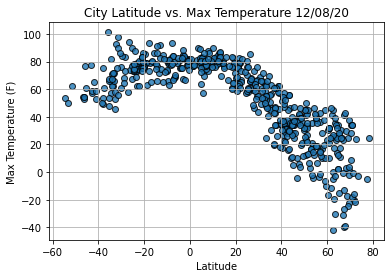

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

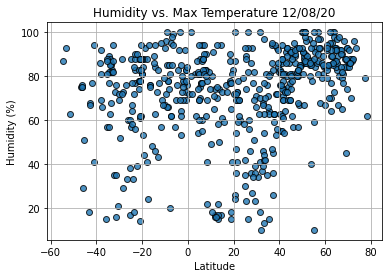

In [36]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Humidity vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

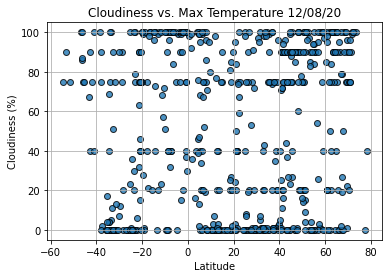

In [37]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Cloudiness vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

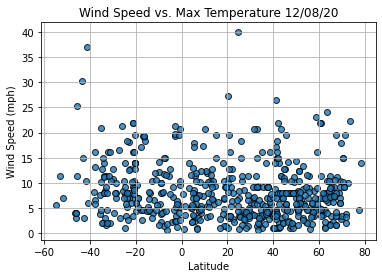

In [38]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Wind Speed vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [62]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

In [63]:
index13=city_data_df.loc[13]
index13

City                     Cidreira
Country                        BR
Date          2020-12-08 18:46:17
Lat                        -30.18
Lng                        -50.21
Max Temp                    75.92
Humidity                       69
Cloudiness                      7
Wind Speed                  10.74
Name: 13, dtype: object

In [64]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2020-12-08 18:43:56,22.29,114.16,66.99,69,67,7.96
2,Albany,US,2020-12-08 18:41:57,42.60,-73.97,28.00,73,90,13.87
5,Kapaa,US,2020-12-08 18:46:17,22.08,-159.32,78.80,78,75,12.75
6,Ribeira Grande,PT,2020-12-08 18:46:17,38.52,-28.70,62.60,72,40,16.11
7,Abu Samrah,SY,2020-12-08 18:46:17,35.30,37.18,56.48,64,99,3.18
...,...,...,...,...,...,...,...,...,...
555,Dekernes,EG,2020-12-08 18:47:05,31.09,31.59,66.20,63,0,9.17
557,Burladingen,DE,2020-12-08 18:47:05,48.28,9.12,34.00,83,100,1.99
558,Abakaliki,NG,2020-12-08 18:47:05,6.32,8.12,86.02,55,100,10.38
559,Mount Pleasant,US,2020-12-08 18:47:05,32.79,-79.86,50.00,39,1,9.17


In [65]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

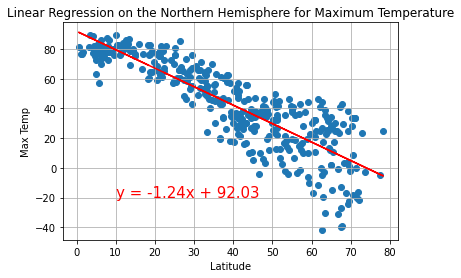

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-20))


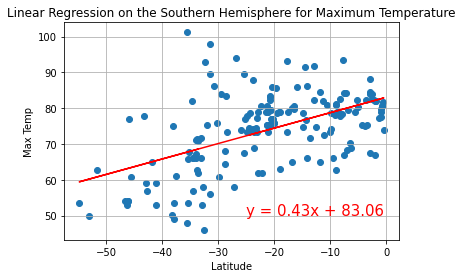

LinregressResult(slope=0.43111894242873394, intercept=83.05784559319306, rvalue=0.5283162429595536, pvalue=1.1159627568863269e-13, stderr=0.053295662445606795)

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-25,50))


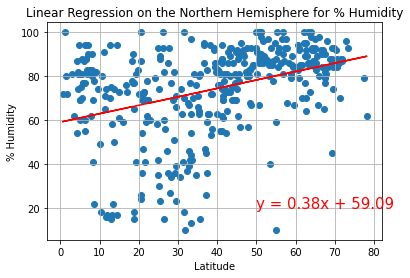

In [71]:
# Linear regression on the Northern Hemisphere and Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(50,20))

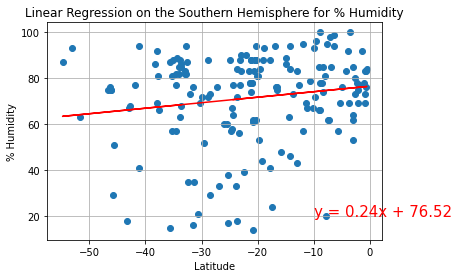

In [73]:
# Linear regression on the Southern Hemisphere and Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-10,20))

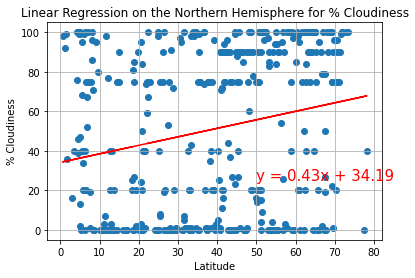

In [75]:
# Linear regression on the Northern Hemisphere and Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(50,25))

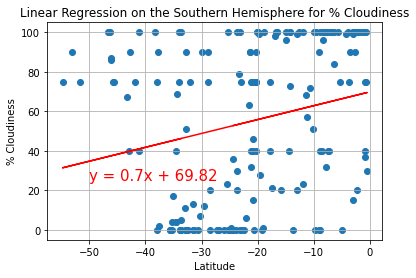

In [78]:
# Linear regression on the Southern Hemisphere and Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,25))

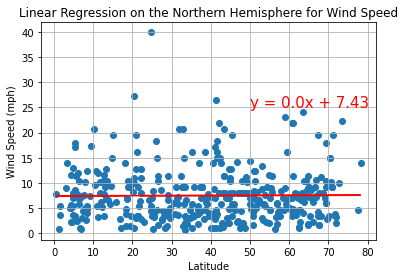

In [79]:
# Linear regression on the Northern Hemisphere and Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)',(50,25))

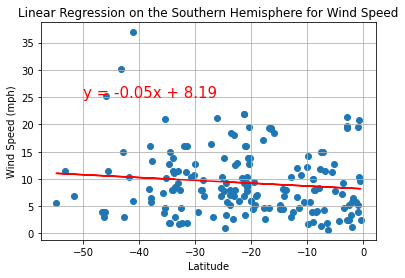

In [80]:
# Linear regression on the Southern Hemisphere and Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)',(-50,25))

# End of side project